In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow as tf

%matplotlib inline

In [2]:
x_data = np.linspace(0, 10, 1000000)
noise = np.random.randn(len(x_data))

y_true = (1/2 * x_data) + 5 + noise

In [3]:
data_df = pd.DataFrame(data=np.concatenate((x_data.reshape(-1,1), y_true.reshape(-1,1)), axis=1), 
                       columns=['x_data', 'y_true'])
data_df

,x_data,y_true
0,0.00000,5.475799
1,0.00001,5.497709
2,0.00002,6.645881
3,0.00003,4.410842
4,0.00004,4.065632
5,0.00005,3.721674
6,0.00006,4.824862
7,0.00007,4.365748
8,0.00008,6.374192
9,0.00009,4.666706


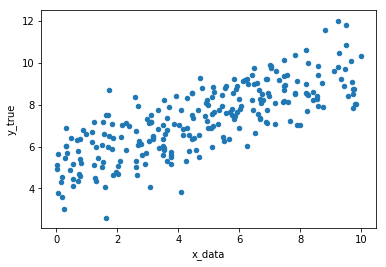

In [4]:
data_df.sample(250).plot(kind='scatter', x='x_data', y='y_true')

In [75]:
# A batch size much larger than this will usually result in exploding gradients!
# Reduce learning_rate if you want to increase batch_size
batch_size = 150
slope = tf.Variable(np.random.randn())
intercept = tf.Variable(np.random.randn())

In [76]:
x_ph = tf.placeholder(tf.float32, [batch_size])
y_ph = tf.placeholder(tf.float32, [batch_size])
y_estimate = slope * x_ph + intercept

In [77]:
error = tf.reduce_sum(tf.square(y_ph - y_estimate))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=1e-4)
train = optimizer.minimize(error)

init = tf.global_variables_initializer()

In [78]:
with tf.Session() as sess:
    batches = 100000
    
    sess.run(init)
    
    for _ in range(batches):
        rand_idx = np.random.randint(len(x_data), size=batch_size)
        feed = {x_ph: x_data[rand_idx], y_ph: y_true[rand_idx]}
        #feed = {x_ph: x_data[range(batch_size)], y_ph: y_true[range(batch_size)]}
        
        sess.run(train, feed_dict=feed)
        
    model_slope, model_intercept = sess.run([slope, intercept])

In [79]:
model_slope, model_intercept

(0.49783275, 5.00051)

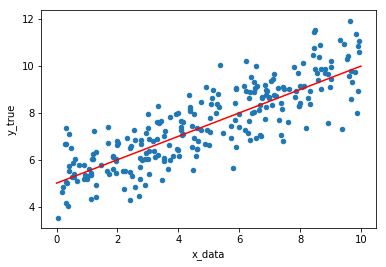

In [74]:
y_hat = model_slope * x_data + model_intercept
data_df.sample(250).plot(kind='scatter', x='x_data', y='y_true')
plt.plot(x_data, y_hat, 'r')